In [35]:
#Load data 
import numpy as np
data = np.genfromtxt('data_raw.csv', delimiter=',', skip_header=1) 
X = []
y = []
for i in range(len(data)):
    X.append(data[i][:99])
    y.append(data[i][99:][0])
X = np.array(X)
y = np.array(y)
y = y.astype("uint8")
print(X.shape)
print(y.shape)

(520, 99)
(520,)


In [36]:
#Generate X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(468, 99)
(468,)
(52, 99)
(52,)


In [37]:
# Build DNN model with keras
import tensorflow.keras as keras

model = Sequential()
model.add(keras.Input(shape=(99,)))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=5, activation='softmax'))
#Compile model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 64)                6400      
_________________________________________________________________
batch_normalization_29 (Batc (None, 64)                256       
_________________________________________________________________
dense_57 (Dense)             (None, 16)                1040      
_________________________________________________________________
batch_normalization_30 (Batc (None, 16)                64        
_________________________________________________________________
dense_58 (Dense)             (None, 5)                 85        
Total params: 7,845
Trainable params: 7,685
Non-trainable params: 160
_________________________________________________________________
None


In [38]:
#Training model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
15/15 [==============================] - 1s 9ms/step - loss: 1.1278 - accuracy: 0.6132 - val_loss: 1.4667 - val_accuracy: 0.2692
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8953 - val_loss: 1.3782 - val_accuracy: 0.5385
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.9509 - val_loss: 1.3140 - val_accuracy: 0.5769
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.9765 - val_loss: 1.2482 - val_accuracy: 0.6538
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9829 - val_loss: 1.1902 - val_accuracy: 0.7692
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9957 - val_loss: 1.1336 - val_accuracy: 0.7500
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9936 - val_loss: 1.0702 - val_accuracy: 0.8846
Epoch 8/50
15/15 [==

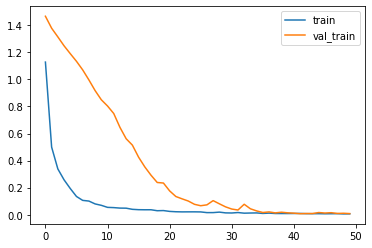

In [39]:
import matplotlib.pyplot as plt 

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val_train")
plt.legend()
plt.show()

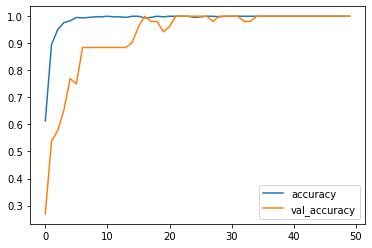

In [40]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [41]:
model.save("action.h5")